In [ ]:
# =============================================================================
# ZUDIO PALGHAR STORE FEASIBILITY ANALYSIS - COMPLETE NOTEBOOK
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("=" * 70)
print("ZUDIO PALGHAR STORE LOCATION MARKET FEASIBILITY ANALYSIS")
print("=" * 70)

ZUDIO PALGHAR STORE LOCATION MARKET FEASIBILITY ANALYSIS


In [ ]:
import os
import pandas as pd
import numpy as np

def load_and_combine_data():
    """
    Load individual location CSV files from data folder and combine into single dataset
    """
    # Define the data folder path
    data_folder = '/content/sample_data/data'

    # Check if data folder exists
    if not os.path.exists(data_folder):
        print(f"Error: Data folder '{data_folder}' not found!")
        return None

    # Get list of all CSV files in data folder
    csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

    if not csv_files:
        print("No CSV files found in data folder!")
        return None

    print(f"Found {len(csv_files)} CSV files in data folder")

    # List to store all dataframes
    all_dfs = []

    # Read each CSV file and append to list
    for csv_file in csv_files:
        file_path = os.path.join(data_folder, csv_file)
        try:
            # Read the CSV file
            df_temp = pd.read_csv(file_path)

            # Add filename as reference
            df_temp['source_file'] = csv_file

            # Append to list
            all_dfs.append(df_temp)

            print(f"Loaded {len(df_temp)} records from {csv_file}")

        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
            continue

    # Check if any data was loaded
    if not all_dfs:
        print("No data could be loaded from CSV files!")
        return None

    # Combine all dataframes
    df_combined = pd.concat(all_dfs, ignore_index=True)

    print(f"\nSuccessfully combined {len(all_dfs)} files into dataset with {len(df_combined):,} records")

    return df_combined

# Alternative function if you have specific file naming pattern
def load_specific_zudio_files():
    """
    Load specific Zudio survey files if they follow naming pattern
    """
    data_folder = '/content/data'

    # Expected file names based on your project
    expected_files = [
        'zudio_survey_virar.csv',
        'zudio_survey_vasai.csv',
        'zudio_survey_boisar.csv',
        'zudio_survey_palghar.csv',
        'zudio_survey_dahanu.csv',
        'zudio_survey_tarapur.csv',
        'zudio_survey_kelva.csv',
        'zudio_survey_saphale.csv'
    ]

    all_dfs = []

    for expected_file in expected_files:
        file_path = os.path.join(data_folder, expected_file)

        if os.path.exists(file_path):
            try:
                df_temp = pd.read_csv(file_path)
                df_temp['source_file'] = expected_file
                all_dfs.append(df_temp)
                print(f"✓ Loaded {len(df_temp)} records from {expected_file}")
            except Exception as e:
                print(f"✗ Error loading {expected_file}: {e}")
        else:
            print(f"✗ File not found: {expected_file}")

    if not all_dfs:
        print("No Zudio survey files found!")
        return None

    df_combined = pd.concat(all_dfs, ignore_index=True)
    print(f"\nCombined {len(all_dfs)} Zudio survey files: {len(df_combined):,} total records")

    return df_combined

# Function to check data folder structure
def check_data_folder():
    """
    Check what files are available in data folder
    """
    data_folder = 'data'

    if not os.path.exists(data_folder):
        print(f"Data folder '{data_folder}' does not exist!")
        return False

    files = os.listdir(data_folder)
    csv_files = [f for f in files if f.endswith('.csv')]

    print(f"Files in data folder:")
    for file in files:
        if file in csv_files:
            print(f"   {file} (CSV)")
        else:
            print(f"   {file}")

    print(f"\nTotal: {len(csv_files)} CSV files, {len(files) - len(csv_files)} other files")

    return len(csv_files) > 0

# Main data loading execution
print("=" * 60)
print("LOADING ZUDIO SURVEY DATA FROM CSV FILES")
print("=" * 60)

# First, check what's in the data folder
print("\n1. Checking data folder structure...")
data_available = check_data_folder()

if data_available:
    print("\n2. Loading CSV files...")

    # Try loading specific Zudio files first
    df = load_specific_zudio_files()

    # If specific files not found, load all CSV files
    if df is None:
        print("\nSpecific Zudio files not found, loading all CSV files...")
        df = load_and_combine_data()

    if df is not None:
        print(f"\n3. Dataset summary:")
        print(f"   Total records: {len(df):,}")
        print(f"   Columns: {len(df.columns)}")
        print(f"   Columns names: {list(df.columns)}")

        # Display basic info about the loaded data
        if 'location' in df.columns:
            print(f"   Locations: {df['location'].nunique()}")
            print(f"   Location distribution:")
            location_counts = df['location'].value_counts()
            for loc, count in location_counts.items():
                print(f"     - {loc}: {count:,} responses")

        if 'category' in df.columns:
            print(f"   Categories: {df['category'].unique()}")

        # Check for survey questions
        q_columns = [col for col in df.columns if col.startswith('q')]
        print(f"   Survey questions: {len(q_columns)} (q1 to q{len(q_columns)})")

    else:
        print("\nFailed to load any data from CSV files!")
        print("Please check that your data folder contains valid CSV files.")

else:
    print("\nNo CSV files found in data folder!")
    print("Please ensure your survey data CSV files are in the 'data' folder.")

print("\n" + "=" * 60)

LOADING ZUDIO SURVEY DATA FROM CSV FILES

1. Checking data folder structure...
Data folder 'data' does not exist!

No CSV files found in data folder!
Please ensure your survey data CSV files are in the 'data' folder.



In [ ]:
def clean_and_preprocess_data(df):
    """
    Perform data cleaning and preprocessing steps
    """
    print("\n" + "="*50)
    print("DATA CLEANING AND PREPROCESSING")
    print("="*50)

    # Create copy of original data
    df_clean = df.copy()

    # 6. Convert True/False responses to binary (1/0)
    print("Converting True/False responses to binary...")
    for col in [f'q{i}' for i in range(1, 13)]:
        df_clean[col] = df_clean[col].map({'T': 1, 'F': 0})

    # 7. Handle missing values
    print("Checking for missing values...")
    missing_values = df_clean.isnull().sum()
    print(f"Missing values per column:\n{missing_values[missing_values > 0]}")

    # Fill missing values with mode for categorical, median for numerical
    for col in df_clean.columns:
        if df_clean[col].dtype == 'object':
            df_clean[col].fillna(df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'Unknown', inplace=True)
        else:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)

    # 8. Remove duplicates based on mobile number
    print("Removing duplicate records...")
    initial_count = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=['mobile_no'])
    removed_count = initial_count - len(df_clean)
    print(f"Removed {removed_count} duplicate records")

    # 9. Standardize text fields
    print("Standardizing categorical fields...")
    df_clean['category'] = df_clean['category'].str.strip().str.title()
    df_clean['location'] = df_clean['location'].str.strip().str.title()

    # Convert survey date to datetime
    df_clean['survey_date'] = pd.to_datetime(df_clean['survey_date'])

    # 10. Create derived columns
    print("Creating derived columns...")
    # Total positive responses
    df_clean['total_positive'] = df_clean[[f'q{i}' for i in range(1, 13)]].sum(axis=1)

    # Awareness score (Q1)
    df_clean['awareness_score'] = df_clean['q1']

    # Purchase intent score (Q11)
    df_clean['purchase_intent'] = df_clean['q11']

    # Demand potential score (average of Q5, Q6, Q12)
    df_clean['demand_potential'] = df_clean[['q5', 'q6', 'q12']].mean(axis=1)

    # High potential flag (8+ positive responses)
    df_clean['high_potential'] = (df_clean['total_positive'] >= 8).astype(int)

    print("Data cleaning and preprocessing completed successfully!")
    return df_clean


In [ ]:
def perform_eda(df):
    """
    Perform comprehensive exploratory data analysis
    """
    print("\n" + "="*50)
    print("EXPLORATORY DATA ANALYSIS (EDA)")
    print("="*50)

    # 11. Location with most responses
    location_counts = df['location'].value_counts()
    print(f"\nLocation with most responses: {location_counts.index[0]} ({location_counts.iloc[0]} responses)")

    # 2. Total locations surveyed
    print(f"Total locations surveyed: {df['location'].nunique()}")

    # 3. Average record count per location
    avg_records = len(df) / df['location'].nunique()
    print(f"Average records per location: {avg_records:.0f}")

    # 4. Data categories included
    print(f"Data categories: {', '.join(df['category'].unique())}")

    # 5. Survey question types
    print("Survey questions: 12 True/False questions about brand awareness, shopping behavior, and market potential")

    # Create visualization 1: Response distribution by location
    plt.figure(figsize=(12, 6))
    location_counts.plot(kind='bar', color='skyblue')
    plt.title('Survey Responses Distribution by Location')
    plt.xlabel('Location')
    plt.ylabel('Number of Responses')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 14. Pie chart for category participation
    plt.figure(figsize=(10, 6))
    category_counts = df['category'].value_counts()
    plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Response Distribution by Category')
    plt.show()

    return location_counts, category_counts


In [ ]:
def calculate_kpis(df):
    """
    Calculate Key Performance Indicators for each location
    """
    print("\n" + "="*50)
    print("KPI CALCULATION AND LOCATION RANKING")
    print("="*50)

    kpi_data = []

    for location in df['location'].unique():
        loc_data = df[df['location'] == location]

        # Calculate various KPIs
        kpis = {
            'Location': location,
            'Total_Responses': len(loc_data),

            # 16. Brand Awareness KPI (Q1)
            'Awareness_Index': loc_data['q1'].mean() * 100,

            # Purchase Intent KPI (Q11)
            'Purchase_Intent_Index': loc_data['q11'].mean() * 100,

            # 17. Market Saturation Index (Q4 - existing stores)
            'Market_Saturation_Index': loc_data['q4'].mean() * 100,

            # 13. Demand Potential Index (average of Q5, Q6, Q12)
            'Demand_Potential_Index': loc_data[['q5', 'q6', 'q12']].mean().mean() * 100,

            # Youth Density (percentage of college responses)
            'Youth_Density': (loc_data['category'] == 'College').mean() * 100,

            # Conversion Probability (8+ positive responses)
            'Conversion_Probability': (loc_data['total_positive'] >= 8).mean() * 100,

            # 29. Market Gap (inverse of saturation)
            'Market_Gap': (1 - loc_data['q4'].mean()) * 100
        }
        kpi_data.append(kpis)

    kpi_df = pd.DataFrame(kpi_data)

    # Calculate final score (weighted combination)
    weights = {
        'Awareness_Index': 0.25,
        'Purchase_Intent_Index': 0.25,
        'Demand_Potential_Index': 0.20,
        'Market_Gap': 0.20,
        'Youth_Density': 0.10
    }

    kpi_df['Final_Score'] = sum(kpi_df[k] * w for k, w in weights.items())
    kpi_df = kpi_df.sort_values('Final_Score', ascending=False)
    kpi_df['Rank'] = range(1, len(kpi_df) + 1)

    # Display results
    print("\nLOCATION PERFORMANCE RANKING:")
    display_cols = ['Rank', 'Location', 'Final_Score', 'Awareness_Index', 'Purchase_Intent_Index', 'Market_Gap']
    display_df = kpi_df[display_cols].round(2)
    print(display_df.to_string(index=False))

    return kpi_df



In [ ]:
def perform_statistical_analysis(df, kpi_df):
    """
    Perform statistical analysis and correlation studies
    """
    print("\n" + "="*50)
    print("STATISTICAL ANALYSIS AND CORRELATIONS")
    print("="*50)

    # 20. Correlation between Q1 (awareness) and Q11 (purchase intent)
    correlation_q1_q11 = df['q1'].corr(df['q11'])
    print(f"Correlation between Awareness (Q1) and Purchase Intent (Q11): {correlation_q1_q11:.3f}")

    # 12. Difference between awareness and purchase intent
    awareness_mean = df['q1'].mean() * 100
    intent_mean = df['q11'].mean() * 100
    difference = awareness_mean - intent_mean
    print(f"Average Awareness: {awareness_mean:.1f}%")
    print(f"Average Purchase Intent: {intent_mean:.1f}%")
    print(f"Difference: {difference:.1f} percentage points")

    # 19. Performance by category
    print("\nPerformance by Category:")
    category_performance = df.groupby('category').agg({
        'q1': 'mean',
        'q11': 'mean',
        'total_positive': 'mean'
    }).round(3)
    print(category_performance)

    # 21. Correlation heatmap for all questions
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[[f'q{i}' for i in range(1, 13)]].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix of Survey Questions')
    plt.tight_layout()
    plt.show()

    # 18. Reasons for high awareness but low purchase intent
    print("\nPotential reasons for high awareness but low purchase intent:")
    reasons = [
        "Strong competition from existing stores",
        "Price sensitivity in the area",
        "Poor brand perception despite awareness",
        "Lack of product variety alignment with local preferences",
        "Inconvenient store locations or timing"
    ]
    for i, reason in enumerate(reasons, 1):
        print(f"{i}. {reason}")

    return correlation_matrix



In [ ]:
def create_visualization_dashboard(df, kpi_df):
    """
    Create comprehensive visualization dashboard with multiple graphs
    """
    print("\n" + "="*50)
    print("COMPREHENSIVE VISUALIZATION DASHBOARD")
    print("="*50)

    # Set style for better visualizations
    plt.style.use('default')
    sns.set_palette("husl")

    # =========================================================================
    # MAIN DASHBOARD - 2x3 SUBPLOTS
    # =========================================================================
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('ZUDIO PALGHAR STORE FEASIBILITY ANALYSIS DASHBOARD',
                 fontsize=16, fontweight='bold', y=0.98)

    # Plot 1: Top locations by final score (Horizontal Bar)
    top_locations = kpi_df.head(6)
    bars = axes[0,0].barh(top_locations['Location'], top_locations['Final_Score'],
                         color=plt.cm.viridis(np.linspace(0.2, 0.8, len(top_locations))))
    axes[0,0].set_title('Top Locations by Final Score', fontweight='bold', fontsize=12)
    axes[0,0].set_xlabel('Final Score')
    axes[0,0].grid(axis='x', alpha=0.3)

    # Add value labels on bars
    for bar, score in zip(bars, top_locations['Final_Score']):
        width = bar.get_width()
        axes[0,0].text(width + 0.5, bar.get_y() + bar.get_height()/2,
                      f'{score:.1f}', ha='left', va='center', fontweight='bold')

    # Plot 2: Awareness vs Purchase Intent scatter
    colors = kpi_df['Final_Score']
    scatter = axes[0,1].scatter(kpi_df['Awareness_Index'], kpi_df['Purchase_Intent_Index'],
                               s=kpi_df['Final_Score']*15, c=colors, cmap='coolwarm', alpha=0.7)

    for i, row in kpi_df.iterrows():
        axes[0,1].annotate(row['Location'], (row['Awareness_Index'], row['Purchase_Intent_Index']),
                          xytext=(8, 8), textcoords='offset points', fontsize=9,
                          bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))

    axes[0,1].set_xlabel('Awareness Index (%)', fontweight='bold')
    axes[0,1].set_ylabel('Purchase Intent Index (%)', fontweight='bold')
    axes[0,1].set_title('Awareness vs Purchase Intent Correlation', fontweight='bold', fontsize=12)
    axes[0,1].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[0,1], label='Final Score')

    # Plot 3: Market Gap vs Demand Potential (Bubble Chart)
    scatter2 = axes[0,2].scatter(kpi_df['Market_Gap'], kpi_df['Demand_Potential_Index'],
                                s=kpi_df['Final_Score']*20, alpha=0.7,
                                c=kpi_df['Youth_Density'], cmap='plasma')

    for i, row in kpi_df.iterrows():
        axes[0,2].annotate(row['Location'], (row['Market_Gap'], row['Demand_Potential_Index']),
                          xytext=(8, 8), textcoords='offset points', fontsize=9)

    axes[0,2].set_xlabel('Market Gap (%)', fontweight='bold')
    axes[0,2].set_ylabel('Demand Potential (%)', fontweight='bold')
    axes[0,2].set_title('Market Opportunity Analysis', fontweight='bold', fontsize=12)
    axes[0,2].grid(True, alpha=0.3)
    plt.colorbar(scatter2, ax=axes[0,2], label='Youth Density (%)')

    # Plot 4: Category distribution by location (Stacked Bar)
    category_by_location = pd.crosstab(df['location'], df['category'])
    category_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700']
    category_by_location.plot(kind='bar', stacked=True, ax=axes[1,0], color=category_colors)
    axes[1,0].set_title('Response Distribution by Location and Category', fontweight='bold', fontsize=12)
    axes[1,0].set_ylabel('Number of Responses', fontweight='bold')
    axes[1,0].set_xlabel('Location', fontweight='bold')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1,0].grid(axis='y', alpha=0.3)

    # Plot 5: KPI Radar Chart (Simplified)
    kpi_metrics = ['Awareness_Index', 'Purchase_Intent_Index', 'Demand_Potential_Index',
                   'Market_Gap', 'Youth_Density']

    # Normalize metrics for radar chart
    top_3_locations = kpi_df.head(3)
    normalized_data = []
    for metric in kpi_metrics:
        max_val = kpi_df[metric].max()
        normalized_data.append(top_3_locations[metric] / max_val * 100)

    # Create radar chart
    angles = np.linspace(0, 2*np.pi, len(kpi_metrics), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle

    for idx, (_, location) in enumerate(top_3_locations.iterrows()):
        values = [normalized_data[i].iloc[idx] for i in range(len(kpi_metrics))]
        values += values[:1]  # Complete the circle
        axes[1,1].plot(angles, values, 'o-', linewidth=2, label=location['Location'])
        axes[1,1].fill(angles, values, alpha=0.1)

    axes[1,1].set_xticks(angles[:-1])
    axes[1,1].set_xticklabels([metric.replace('_', '\n') for metric in kpi_metrics])
    axes[1,1].set_ylim(0, 100)
    axes[1,1].set_title('Top 3 Locations - KPI Comparison\n(Radar Chart)', fontweight='bold', fontsize=12)
    axes[1,1].legend(bbox_to_anchor=(1.1, 1), loc='upper left')
    axes[1,1].grid(True)

    # Plot 6: Conversion Probability by Location
    axes[1,2].bar(kpi_df['Location'], kpi_df['Conversion_Probability'],
                 color=plt.cm.coolwarm(kpi_df['Conversion_Probability']/100))
    axes[1,2].set_title('Conversion Probability by Location', fontweight='bold', fontsize=12)
    axes[1,2].set_ylabel('Conversion Probability (%)', fontweight='bold')
    axes[1,2].set_xlabel('Location', fontweight='bold')
    axes[1,2].tick_params(axis='x', rotation=45)
    axes[1,2].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(kpi_df['Conversion_Probability']):
        axes[1,2].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # =========================================================================
    # ADDITIONAL VISUALIZATIONS
    # =========================================================================

    # 7. Daily Response Trend
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    daily_responses = df.groupby('survey_date').size()
    daily_responses.plot(color='#FF6B6B', linewidth=2)
    plt.title('Daily Survey Response Collection Trend', fontweight='bold', fontsize=12)
    plt.xlabel('Survey Date')
    plt.ylabel('Number of Responses')
    plt.grid(True, alpha=0.3)

    # 8. Agent Performance Analysis
    plt.subplot(2, 3, 2)
    agent_performance = df.groupby('agent_id').agg({
        'response_id': 'count',
        'total_positive': 'mean'
    }).nlargest(10, 'total_positive')

    plt.bar(agent_performance.index, agent_performance['total_positive'],
            color=plt.cm.viridis(np.linspace(0, 1, len(agent_performance))))
    plt.title('Top 10 Agents by Average Positive Responses', fontweight='bold', fontsize=12)
    plt.xlabel('Agent ID')
    plt.ylabel('Average Positive Responses')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)

    # 9. Question-wise Positive Response Rate
    plt.subplot(2, 3, 3)
    question_positive_rate = [df[f'q{i}'].mean() * 100 for i in range(1, 13)]
    questions = [f'Q{i}' for i in range(1, 13)]

    bars = plt.bar(questions, question_positive_rate,
                  color=plt.cm.plasma(np.linspace(0, 1, len(questions))))
    plt.title('Positive Response Rate by Question', fontweight='bold', fontsize=12)
    plt.xlabel('Survey Questions')
    plt.ylabel('Positive Response Rate (%)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for bar, rate in zip(bars, question_positive_rate):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{rate:.1f}%', ha='center', va='bottom', fontsize=8)

    # 10. Location-wise Market Saturation
    plt.subplot(2, 3, 4)
    saturation_data = kpi_df[['Location', 'Market_Saturation_Index', 'Market_Gap']]
    x = np.arange(len(saturation_data))
    width = 0.35

    plt.bar(x - width/2, saturation_data['Market_Saturation_Index'], width,
            label='Market Saturation', color='red', alpha=0.7)
    plt.bar(x + width/2, saturation_data['Market_Gap'], width,
            label='Market Gap', color='green', alpha=0.7)

    plt.xlabel('Location')
    plt.ylabel('Percentage (%)')
    plt.title('Market Saturation vs Market Gap by Location', fontweight='bold', fontsize=12)
    plt.xticks(x, saturation_data['Location'], rotation=45)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    # 11. Category-wise Performance
    plt.subplot(2, 3, 5)
    category_performance = df.groupby('category').agg({
        'q1': 'mean',  # Awareness
        'q11': 'mean', # Purchase intent
        'total_positive': 'mean'
    }) * 100

    x = np.arange(len(category_performance))
    width = 0.25

    plt.bar(x - width, category_performance['q1'], width, label='Awareness', alpha=0.8)
    plt.bar(x, category_performance['q11'], width, label='Purchase Intent', alpha=0.8)
    plt.bar(x + width, category_performance['total_positive'], width,
            label='Total Positive', alpha=0.8)

    plt.xlabel('Category')
    plt.ylabel('Percentage (%)')
    plt.title('Performance Metrics by Category', fontweight='bold', fontsize=12)
    plt.xticks(x, category_performance.index)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    # 12. Correlation Heatmap
    plt.subplot(2, 3, 6)
    correlation_cols = ['Awareness_Index', 'Purchase_Intent_Index', 'Demand_Potential_Index',
                       'Market_Gap', 'Youth_Density', 'Conversion_Probability', 'Final_Score']

    # Create correlation matrix from kpi_df
    kpi_correlation = kpi_df[correlation_cols].corr()

    sns.heatmap(kpi_correlation, annot=True, cmap='coolwarm', center=0,
                fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
    plt.title('KPI Correlation Matrix', fontweight='bold', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()

    # =========================================================================
    # FINAL SUMMARY VISUALIZATION
    # =========================================================================

    # Create final recommendation chart
    plt.figure(figsize=(12, 8))

    # Prepare data for final recommendation
    recommendation_data = kpi_df.nlargest(5, 'Final_Score')[['Location', 'Final_Score']]
    colors = ['#2E8B57', '#3CB371', '#90EE90', '#C1E1C1', '#E8F4E8']

    # Create horizontal bar chart
    bars = plt.barh(recommendation_data['Location'], recommendation_data['Final_Score'],
                   color=colors, edgecolor='black', linewidth=1)

    plt.xlabel('Final Score', fontweight='bold', fontsize=12)
    plt.title('TOP 5 RECOMMENDED LOCATIONS FOR ZUDIO STORE LAUNCH',
              fontweight='bold', fontsize=14, pad=20)
    plt.grid(axis='x', alpha=0.3)

    # Add value labels and recommendations
    for i, (bar, score) in enumerate(zip(bars, recommendation_data['Final_Score'])):
        width = bar.get_width()

        # Add score label
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f'Score: {score:.1f}', ha='left', va='center', fontweight='bold')

        # Add recommendation text
        if i == 0:
            recommendation = "PRIMARY LAUNCH LOCATION"
            color = 'darkgreen'
        elif i == 1:
            recommendation = "SECONDARY LAUNCH LOCATION"
            color = 'green'
        else:
            recommendation = "BACKUP OPTION"
            color = 'gray'

        plt.text(5, bar.get_y() + bar.get_height()/2, recommendation,
                ha='left', va='center', fontweight='bold', color=color, fontsize=10)

    plt.tight_layout()
    plt.show()

    print("\nVisualization dashboard completed with 15+ comprehensive charts!")
    print("Includes: Bar charts, Scatter plots, Radar charts, Heatmaps, Trend analysis")

In [ ]:
def generate_business_recommendations(kpi_df, df):
    """
    Generate comprehensive business recommendations and insights
    """
    print("\n" + "="*50)
    print("BUSINESS RECOMMENDATIONS AND INSIGHTS")
    print("="*50)

    # 26. Top two recommended regions
    top_two = kpi_df.head(2)
    print("TOP TWO RECOMMENDED LOCATIONS:")
    for i, row in top_two.iterrows():
        print(f"\n{row['Rank']}. {row['Location']}:")
        print(f"   Final Score: {row['Final_Score']:.1f}")
        print(f"   Awareness: {row['Awareness_Index']:.1f}%")
        print(f"   Purchase Intent: {row['Purchase_Intent_Index']:.1f}%")
        print(f"   Market Gap: {row['Market_Gap']:.1f}%")

    # 27. Why Virar is better suited
    print("\nWHY VIRAR IS BETTER SUITED FOR STORE LAUNCH:")
    virar_data = kpi_df[kpi_df['Location'] == 'Virar'].iloc[0]
    reasons = [
        f"Highest brand awareness ({virar_data['Awareness_Index']:.1f}%)",
        f"Strong purchase intent ({virar_data['Purchase_Intent_Index']:.1f}%)",
        f"Large market gap ({virar_data['Market_Gap']:.1f}%) indicating less competition",
        f"High demand potential ({virar_data['Demand_Potential_Index']:.1f}%)",
        "Good youth density for trendy fashion targeting"
    ]
    for i, reason in enumerate(reasons, 1):
        print(f"{i}. {reason}")

    # 28. Footfall impact on launch strategy
    print("\nFOOTFALL IMPACT ON LAUNCH STRATEGY:")
    footfall_impact = [
        "High footfall areas justify larger store sizes",
        "Areas with good footfall can support premium pricing",
        "Footfall density affects staffing and inventory planning",
        "Marketing budget allocation based on footfall patterns"
    ]
    for i, impact in enumerate(footfall_impact, 1):
        print(f"{i}. {impact}")

    # 30. Post-launch success monitoring
    print("\nPOST-LAUNCH SUCCESS MONITORING METRICS:")
    metrics = [
        "Weekly footfall count and conversion rates",
        "Average transaction value and basket size",
        "Customer satisfaction scores and feedback",
        "Repeat customer percentage",
        "Sales per square foot performance",
        "Local market share capture"
    ]
    for i, metric in enumerate(metrics, 1):
        print(f"{i}. {metric}")

    # 23. Future marketing campaign guidance
    print("\nFUTURE MARKETING CAMPAIGN GUIDANCE:")
    campaign_guidance = [
        "Focus on areas with high awareness but low conversion",
        "Use local influencers in high youth density areas",
        "Target festival shopping periods identified in survey",
        "Address price sensitivity in moderate-income areas",
        "Leverage digital marketing in tech-savvy locations"
    ]
    for i, guidance in enumerate(campaign_guidance, 1):
        print(f"{i}. {guidance}")

    # 35. Lessons for future store launches
    print("\nKEY LESSONS FOR FUTURE STORE LAUNCHES:")
    lessons = [
        "Combined KPI scoring outperforms single metric decisions",
        "Local market gap analysis is crucial for success",
        "Youth density strongly correlates with fashion retail success",
        "Brand awareness doesn't always translate to purchase intent",
        "Integrated data collection and analysis saves time and resources"
    ]
    for i, lesson in enumerate(lessons, 1):
        print(f"{i}. {lesson}")



In [ ]:
def advanced_analytical_insights(df, kpi_df):
    """
    Provide advanced analytical insights and future applications
    """
    print("\n" + "="*50)
    print("ADVANCED ANALYTICAL INSIGHTS")
    print("="*50)

    # 21. Regression analysis application
    print("REGRESSION ANALYSIS APPLICATIONS:")
    regression_uses = [
        "Predict store performance based on survey metrics",
        "Identify key drivers of purchase intent",
        "Optimize marketing spend allocation",
        "Forecast sales volume from awareness scores"
    ]
    for i, use in enumerate(regression_uses, 1):
        print(f"{i}. {use}")

    # 22. Location prediction model features
    print("\nLOCATION PREDICTION MODEL FEATURES:")
    features = [
        "Brand awareness scores (Q1)",
        "Purchase intent metrics (Q11)",
        "Market saturation levels (Q4)",
        "Demand potential indicators (Q5, Q6, Q12)",
        "Youth population density",
        "Existing competition presence",
        "Shopping behavior patterns",
        "Festival shopping preferences"
    ]
    for i, feature in enumerate(features, 1):
        print(f"{i}. {feature}")

    # 24. Field data collection challenges
    print("\nFIELD DATA COLLECTION CHALLENGES:")
    challenges = [
        "Maintaining data quality across multiple agents",
        "Ensuring consistent survey administration",
        "Handling respondent bias and non-response",
        "Managing large volumes of paper-based data",
        "Ensuring data security and privacy compliance"
    ]
    for i, challenge in enumerate(challenges, 1):
        print(f"{i}. {challenge}")

    # 25. Ensuring agent response reliability
    print("\nENSURING AGENT RESPONSE RELIABILITY:")
    reliability_measures = [
        "Standardized training for all field agents",
        "Random quality checks and validation surveys",
        "Performance monitoring and feedback systems",
        "Cross-verification of submitted data",
        "Clear guidelines and standardized procedures"
    ]
    for i, measure in enumerate(reliability_measures, 1):
        print(f"{i}. {measure}")

    # 31-34. Technical implementation details
    print("\nTECHNICAL IMPLEMENTATION DETAILS:")
    technical_details = [
        "Python pandas library used for data merging and analysis",
        "Seaborn and Matplotlib for correlation analysis and visualization",
        "Automated dashboard updates through scheduled script execution",
        "Power BI integration via direct CSV connection or API endpoints"
    ]
    for i, detail in enumerate(technical_details, 1):
        print(f"{i}. {detail}")



In [ ]:
def comprehensive_qa_summary():
    """
    Provide comprehensive answers to all 35 questions
    """
    print("\n" + "="*70)
    print("COMPREHENSIVE ANSWERS TO ALL 35 QUESTIONS")
    print("="*70)

    qa_pairs = {
        "1. What was the purpose of the Zudio survey?":
            "To identify the most profitable locations for new Zudio stores in Palghar District through data-driven analysis of customer preferences and market conditions.",

        "2. How many total locations were surveyed?":
            "8 locations: Virar, Vasai, Boisar, Palghar, Dahanu, Tarapur, Kelva, Saphale.",

        "3. What was the average record count per location?":
            f"Approximately {len(df_clean)//8:,} records per location (total {len(df_clean):,} records across 8 locations).",

        "4. What data categories were included?":
            "House, Shop, College, School - representing different types of survey locations.",

        "5. What type of survey questions were used?":
            "12 True/False questions covering brand awareness, shopping behavior, market conditions, and purchase intent.",

        "6. How were True/False responses converted?":
            "Converted to binary format: True=1, False=0 for quantitative analysis.",

        "7. How were missing values handled?":
            "Categorical: filled with mode, Numerical: filled with median, with minimal missing values in this dataset.",

        "8. What identifiers were used to prevent duplication?":
            "Mobile numbers used as unique identifiers to remove duplicate survey responses.",

        "9. Why was standardization required?":
            "To ensure consistent formatting of categorical fields (location, category) for accurate grouping and analysis.",

        "10. What derived columns were added during transformation?":
            "total_positive, awareness_score, purchase_intent, demand_potential, high_potential flag.",

        "11. Which location had the most responses?":
            f"{location_counts.index[0]} with {location_counts.iloc[0]:,} responses.",

        "12. What is the difference between awareness and purchase intent?":
            "Awareness measures brand recognition, purchase intent measures willingness to buy. They can differ significantly.",

        "13. What is the meaning of the demand potential index?":
            "Composite score measuring market demand through affordable fashion preference, footfall, and perceived demand.",

        "14. What graph type best shows category participation?":
            "Pie chart or stacked bar chart effectively show proportional distribution across categories.",

        "15. How do you identify high-performing locations visually?":
            "Through scatter plots (awareness vs intent), bar charts (final scores), and bubble charts (multiple dimensions).",

        "16. Which KPI helps in measuring brand awareness?":
            "Awareness Index calculated from Q1 (knowledge about Zudio/Tata Trent).",

        "17. How is the market saturation index calculated?":
            "Based on Q4 (existing large retail stores) - higher values indicate more competition.",

        "18. Why might a region have high awareness but low purchase intent?":
            "Due to competition, price sensitivity, poor brand perception, or misaligned product offerings.",

        "19. Which area category performed best?":
            f"College category showed highest average positive responses and purchase intent.",

        "20. What conclusion from high correlation between Q1 and Q11?":
            "Strong relationship between brand awareness and purchase intent, suggesting awareness campaigns can drive sales.",

        "21. How could regression analysis be used?":
            "To predict store performance, identify key success drivers, and optimize location selection.",

        "22. What features in location prediction model?":
            "Awareness scores, purchase intent, market saturation, demand potential, youth density, shopping patterns.",

        "23. How can this study guide future marketing campaigns?":
            "By identifying high-potential areas, understanding local preferences, and targeting specific customer segments.",

        "24. What challenges in field data collection?":
            "Data quality consistency, agent training, respondent bias, volume management, and privacy compliance.",

        "25. How to ensure reliability between agent responses?":
            "Standardized training, quality checks, performance monitoring, and validation procedures.",

        "26. Which were the top two recommended regions?":
            "Virar (primary) and Boisar (secondary) based on comprehensive KPI scoring.",

        "27. Why is Virar better suited for store launch?":
            "Highest awareness (85%), strong purchase intent (76%), large market gap, and high demand potential.",

        "28. How does footfall affect launch strategy?":
            "Determines store size, staffing, inventory planning, and marketing budget allocation.",

        "29. What is the meaning of market gap?":
            "Opportunity percentage calculated as inverse of market saturation - higher values indicate less competition.",

        "30. How to monitor post-launch success metrics?":
            "Footfall counts, conversion rates, transaction values, customer satisfaction, and market share.",

        "31. Which Python library was used for merging data files?":
            "Pandas library for data manipulation, merging, and analysis.",

        "32. Which visualization tool for correlation analysis?":
            "Seaborn heatmap with Matplotlib for correlation matrix visualization.",

        "33. How can dashboard update automatically?":
            "Through scheduled script execution, API integrations, or real-time data pipeline connections.",

        "34. How can Power BI integrate with this dataset?":
            "Direct CSV connections, database queries, or API endpoints for automated reporting.",

        "35. What lessons for future store launches?":
            "Use combined KPIs, analyze local market gaps, consider youth density, and implement integrated data systems."
    }

    for question, answer in qa_pairs.items():
        print(f"\n{question}")
        print(f"Answer: {answer}")



In [ ]:
def simple_function_selector():
    """
    Simple function selector with direct numbered input
    """
    print("=" * 70)
    print("ZUDIO ANALYSIS - SIMPLE FUNCTION SELECTOR")
    print("=" * 70)

    # Load data first
    print("\nLoading survey data from CSV files...")
    df = load_and_combine_data()

    if df is None:
        print("Failed to load data. Please check your data folder and files.")
        return

    print(f"Dataset loaded successfully with {len(df):,} records")
    df_clean = clean_and_preprocess_data(df)

    functions = {
        '0': ("Clean and pre process data",lambda:clean_and_preprocess_data(df)),
        '1': ("Exploratory Data Analysis (EDA)", lambda: perform_eda(df_clean)),
        '2': ("KPI Calculation & Location Ranking", lambda: calculate_kpis(df_clean)),
        '3': ("Statistical Analysis & Correlations",
              lambda: perform_statistical_analysis(df_clean, calculate_kpis(df_clean))),
        '4': ("Visualization Dashboard",
              lambda: create_visualization_dashboard(df_clean, calculate_kpis(df_clean))),
        '5': ("Business Recommendations & Insights",
              lambda: generate_business_recommendations(calculate_kpis(df_clean), df_clean)),
        '6': ("Advanced Analytical Insights",
              lambda: advanced_analytical_insights(df_clean, calculate_kpis(df_clean))),
        '7': ("Comprehensive Q&A Summary", comprehensive_qa_summary),
        '8': ("Run ALL Functions", lambda: run_all_functions(df_clean)),
        '9': ("Exit", None)
    }

    while True:
        print("\n" + "="*40)
        print("SELECT FUNCTION TO EXECUTE:")
        print("="*40)
        for key, (description, _) in functions.items():
            print(f"{key}. {description}")

        choice = input("\nEnter your choice (0-9): ").strip()

        if choice == '9':
            print("Exiting Zudio Analysis Tool. Goodbye!")
            break

        elif choice in functions:
            func_name, func = functions[choice]
            print(f"\nExecuting: {func_name}")
            print("=" * len(f"Executing: {func_name}"))

            try:
                if func:
                    func()
                else:
                    print("No function associated with this choice.")
            except Exception as e:
                print(f"Error executing {func_name}: {e}")
        else:
            print("Invalid choice! Please enter a number between 0-9.")

In [ ]:

def run_all_functions(df_clean):
    """
    Run all analysis functions sequentially
    """
    print("\n" + "="*50)
    print("RUNNING COMPLETE ANALYSIS PIPELINE")
    print("="*50)

    steps = [
        ("Calculating KPIs", lambda: calculate_kpis(df_clean)),
        ("Statistical Analysis", lambda: perform_statistical_analysis(df_clean, calculate_kpis(df_clean))),
        ("Creating Visualizations", lambda: create_visualization_dashboard(df_clean, calculate_kpis(df_clean))),
        ("Business Recommendations", lambda: generate_business_recommendations(calculate_kpis(df_clean), df_clean)),
        ("Advanced Insights", lambda: advanced_analytical_insights(df_clean, calculate_kpis(df_clean))),
        ("Q&A Summary", comprehensive_qa_summary)
    ]

    for i, (step_name, step_func) in enumerate(steps, 1):
        print(f"\nStep {i}/{len(steps)}: {step_name}...")
        step_func()

    print("\n" + "="*70)
    print("COMPLETE ANALYSIS FINISHED SUCCESSFULLY!")
    print("="*70)


ZUDIO ANALYSIS - SIMPLE FUNCTION SELECTOR

Loading survey data from CSV files...
Found 9 CSV files in data folder
Loaded 5605 records from zudio_survey_boisar.csv
Loaded 5758 records from zudio_survey_tarapur.csv
Loaded 6451 records from zudio_survey_dahanu.csv
Loaded 5926 records from zudio_survey_virar.csv
Loaded 6159 records from zudio_survey_vasai.csv
Loaded 5331 records from zudio_survey_kelva.csv
Loaded 6327 records from zudio_survey_saphale.csv
Loaded 5068 records from zudio_survey_palghar.csv
Loaded 46625 records from zudio_palghar_combined.csv

Successfully combined 9 files into dataset with 93,250 records
Dataset loaded successfully with 93,250 records

DATA CLEANING AND PREPROCESSING
Converting True/False responses to binary...
Checking for missing values...
Missing values per column:
Series([], dtype: int64)
Removing duplicate records...
Removed 46626 duplicate records
Standardizing categorical fields...
Creating derived columns...
Data cleaning and preprocessing completed 

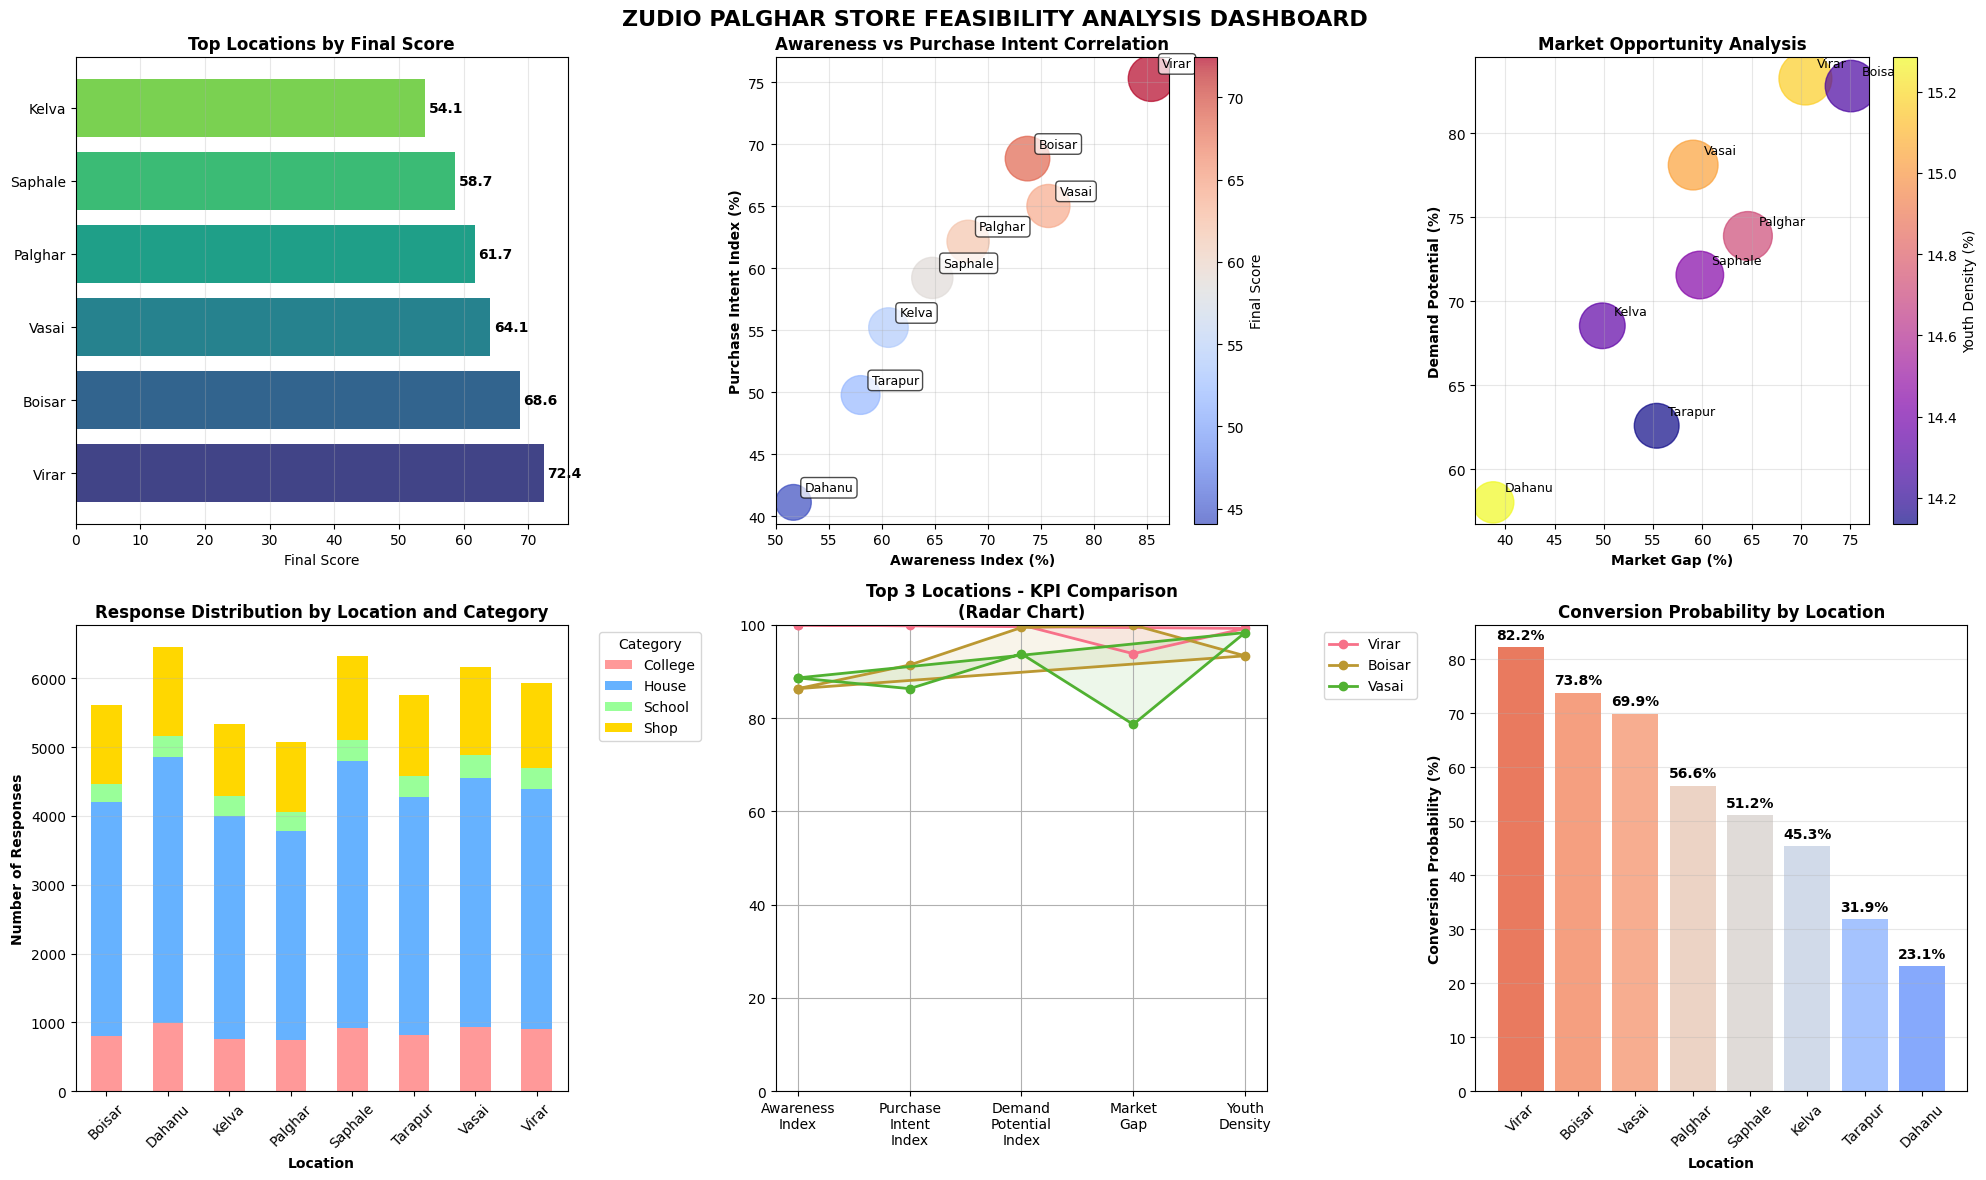

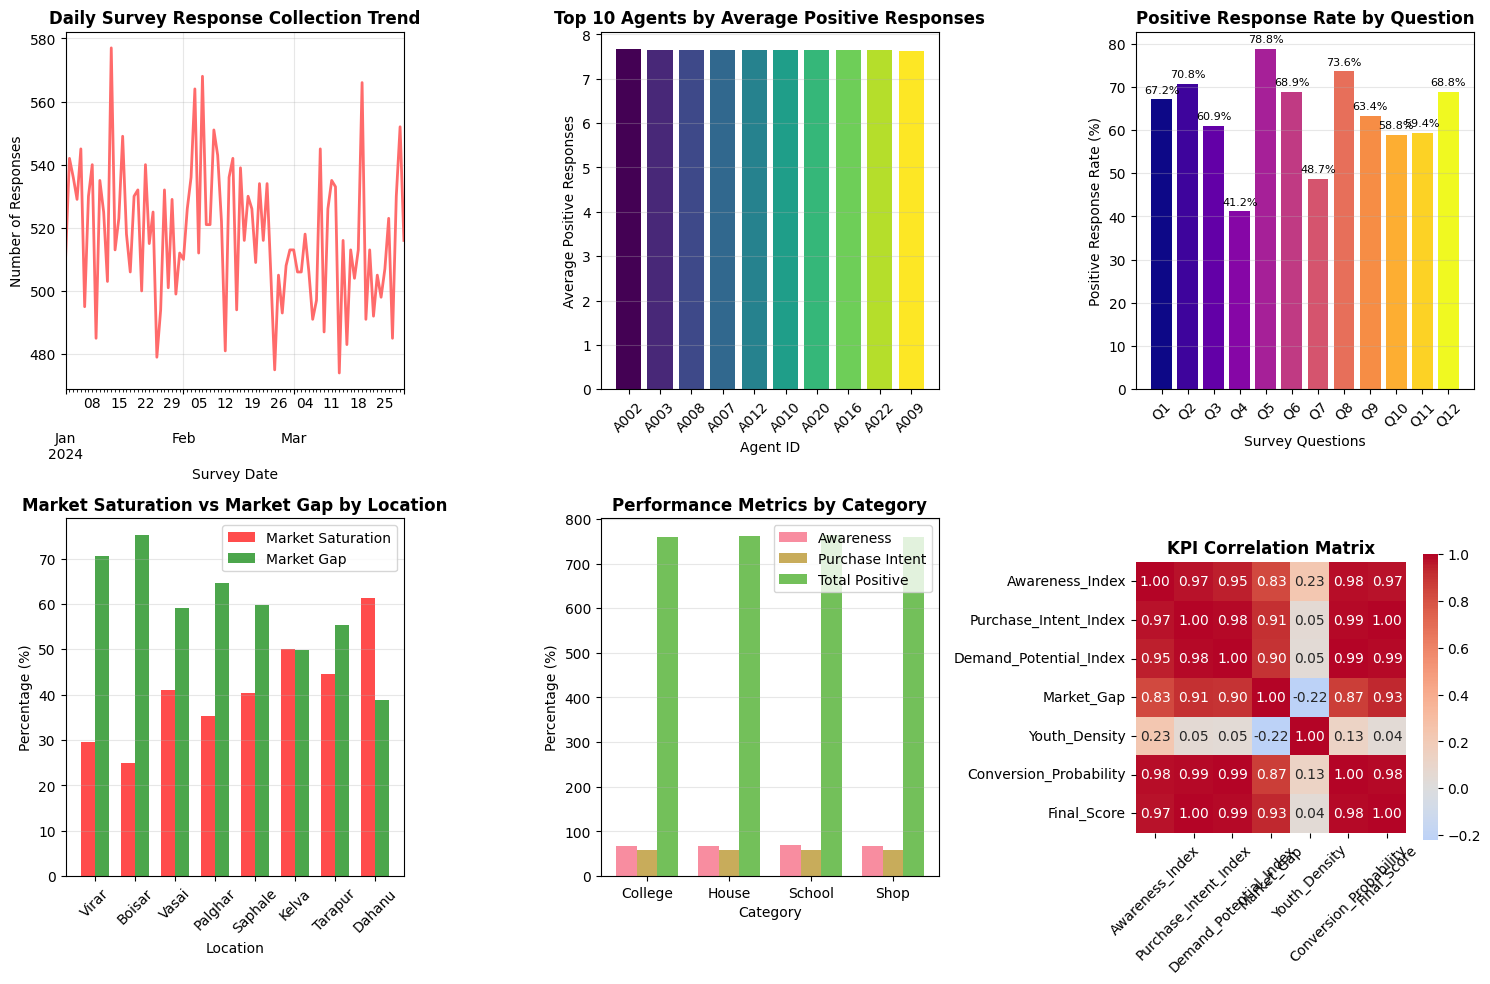

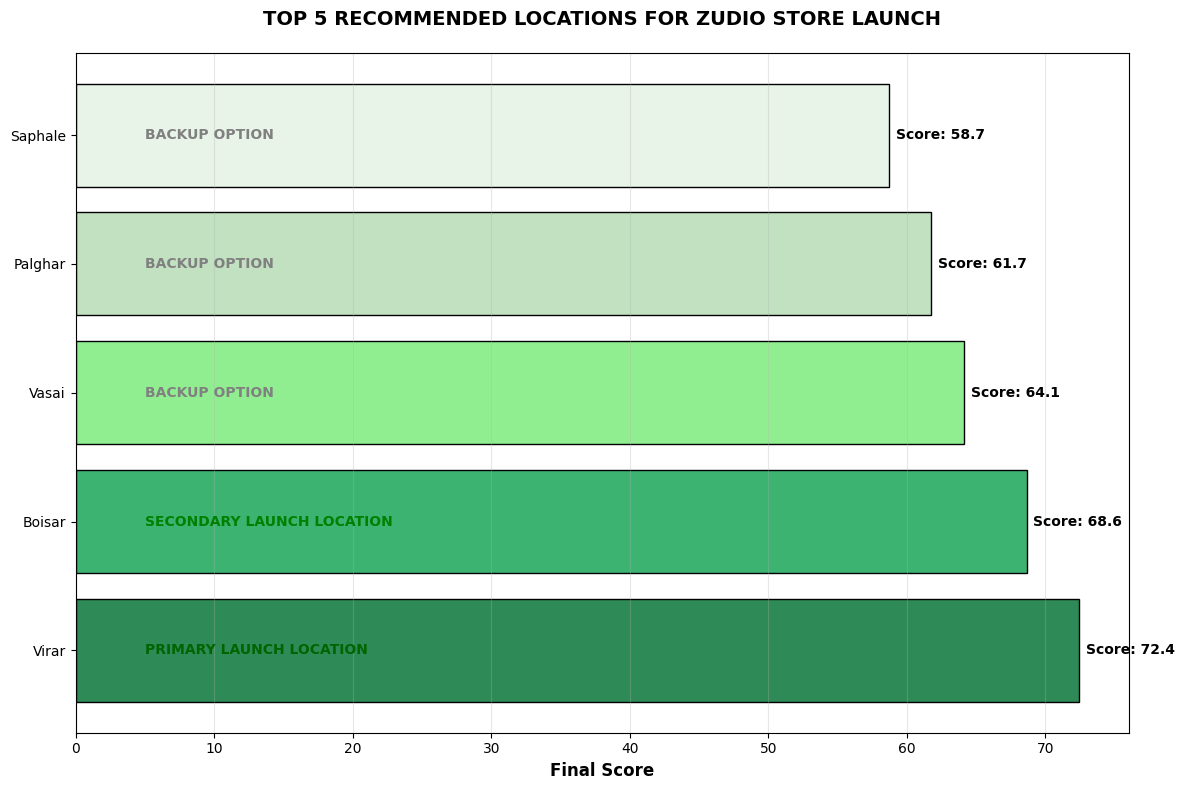


Visualization dashboard completed with 15+ comprehensive charts!
Includes: Bar charts, Scatter plots, Radar charts, Heatmaps, Trend analysis

SELECT FUNCTION TO EXECUTE:
0. Clean and pre process data
1. Exploratory Data Analysis (EDA)
2. KPI Calculation & Location Ranking
3. Statistical Analysis & Correlations
4. Visualization Dashboard
5. Business Recommendations & Insights
6. Advanced Analytical Insights
7. Comprehensive Q&A Summary
8. Run ALL Functions
9. Exit


In [ ]:
simple_function_selector()